In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd


In [15]:
# Load data from a CSV file
file_path = 'corso2020output.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)
data['p_lhPa']=data['WP']*1e4
#fw_cutoff =  0.09497583
data['fw'] = data['gs']/max(data['gs'])# - fw_cutoff

In [60]:
data.loc[data['p_lhPa']<=-15000,'fw' ]=0

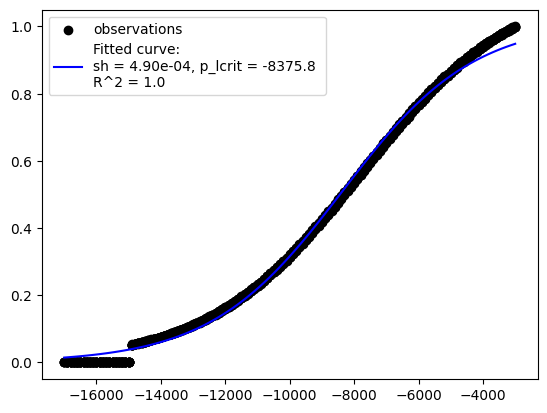

In [61]:
# Define a negative exponential function

def getfw(p_lhPa, sh, p_lcrit):
    fwr = 1e-16; #residual opening when water stress parametrised with data from corso2020 [-]
    fw_cutoff =  0.04072;# to make it easier to get fw
    fwtemp = (1.- fwr)*(1+np.exp(sh*p_lcrit))/(1+np.exp(sh*(p_lcrit-p_lhPa))) #- fw_cutoff
    if isinstance(p_lhPa, (float,int)):
        fwtemp = max(0,fwtemp)
    else:
        fwtemp[fwtemp<0.]=0.
    fw = fwr + fwtemp
    return fw


def getInitcurve(x_data, y_data):

    # Use curve_fit to find the best parameters
    # Provide initial guesses for a and b
    initial_guess = [5e-4, -6000]
    params, covariance = curve_fit(getfw, x_data, y_data, p0=initial_guess)

    # Extract the parameters
    a_fit, b_fit = params


    # Plot the data and the fitted curve
    x_fit = np.linspace(min(x_data), max(x_data), 100)  # Finer x range for a smooth curve
    y_fit = getfw(x_fit, a_fit, b_fit)
    residuals = y_data- getfw(x_data, *params)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_data-np.mean(y_data))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.scatter(x_data, y_data, label="observations", color='k')  # Original data
    plt.plot(x_fit, y_fit, 
                     label=f"Fitted curve:\nsh = {a_fit:.2e}, p_lcrit = {b_fit:.1f} \nR^2 = {r_squared:.1f}", 
             color='b')  # Fitted curve

    #plt.xlabel("perirhizal zone volume (cm3)")
    #plt.ylabel("mean cs concentraiton (mol C/cm3 water)")
    #plt.title("Example of cs gradient around the roots")
    plt.legend()
    plt.show()
    return a_fit, b_fit

        
a_fit, b_fit = getInitcurve(data['p_lhPa'],data['fw'])

In [62]:
getfw(-200, 4.8e-4, -8379)

0.9982294678046366

In [66]:
getfw(-15000, 4.8e-4, -8379)

0.0407157182237459

In [40]:
print(a_fit, b_fit)

0.0004654519575887238 -8847.696042948217


In [41]:
 -15000*0.6

-9000.0

In [43]:
4.655e-4

0.0004655

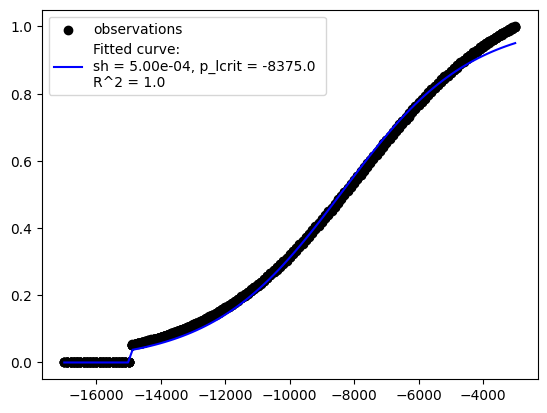

In [78]:
def getfw(p_lhPa, sh, p_lcrit):
    fwr = 1e-16; #residual opening when water stress parametrised with data from corso2020 [-]
    
        
    
    if isinstance(p_lhPa, (float,int)):
        if p_lhPa <= -14000:
            fw_cutoff =  0.04072;# to make it easier to get fw
        else:
            fw_cutoff =  0.;# to make it easier to get fw
        fwtemp = (1.- fwr)*(1+np.exp(sh*p_lcrit))/(1+np.exp(sh*(p_lcrit-p_lhPa))) - fw_cutoff
        fwtemp = max(0,fwtemp)
    else:
        fw_cutoff = np.zeros(p_lhPa.shape)
        fw_cutoff[ p_lhPa <= -14900]=0.04072
        fwtemp = (1.- fwr)*(1+np.exp(sh*p_lcrit))/(1+np.exp(sh*(p_lcrit-p_lhPa))) - fw_cutoff
        fwtemp[fwtemp<0.]=0.
    fw = fwr + fwtemp
    return fw


def getInitcurve(x_data, y_data):

    # Extract the parameters
    a_fit, b_fit = [5e-4, -8375]


    # Plot the data and the fitted curve
    x_fit = np.linspace(min(x_data), max(x_data), 100)  # Finer x range for a smooth curve
    y_fit = getfw(x_fit, a_fit, b_fit)
    residuals = y_data- getfw(x_data,a_fit, b_fit)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_data-np.mean(y_data))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.scatter(x_data, y_data, label="observations", color='k')  # Original data
    plt.plot(x_fit, y_fit, 
                     label=f"Fitted curve:\nsh = {a_fit:.2e}, p_lcrit = {b_fit:.1f} \nR^2 = {r_squared:.1f}", 
             color='b')  # Fitted curve

    #plt.xlabel("perirhizal zone volume (cm3)")
    #plt.ylabel("mean cs concentraiton (mol C/cm3 water)")
    #plt.title("Example of cs gradient around the roots")
    plt.legend()
    plt.show()
    return a_fit, b_fit

        
a_fit, b_fit = getInitcurve(data['p_lhPa'],data['fw'])

In [80]:
getfw(-600, 5e-4, -8375)

0.9947943718869822